In [48]:
import sys
sys.path.append('../../NLP_analysis/')

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from Scripts.textclassfier import TextClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score, make_scorer, f1_score
from sklearn.model_selection import learning_curve

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import RidgeClassifier
import xgboost as xgb
from sklearn.utils import class_weight

In [50]:
df = pd.read_csv('../data/complete_cleaned_spellings_Restaurant_reviews.csv', index_col=0)

# Improve model
First, we want to try different models to get an overview of their results, and then understand which models we can use. We will cycle through 5 models with 2 different vectorizers and print classifications to find the model that works best

## CountVectorizer

In [51]:
X = df['cleaned_text']
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Liste des modèles à évaluer
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": MultinomialNB(),
    "Linear_model": RidgeClassifier()
}


for name, model in models.items():
    print(f"Evaluating model: {name}\n" + "-" * 30)
    
    classifier = TextClassifier(model=model, vectorizer= CountVectorizer(max_features=5000, stop_words='english'))
    classifier.train(X_train, y_train)
    classifier.evaluate(X_test, y_test)
    
    print("\n\n")

Evaluating model: Logistic Regression
------------------------------


/Users/kzd/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.5980592441266599
              precision    recall  f1-score   support

           1       0.72      0.79      0.75       356
           2       0.30      0.17      0.22       141
           3       0.38      0.29      0.33       238
           4       0.47      0.42      0.44       465
           5       0.68      0.80      0.73       758

    accuracy                           0.60      1958
   macro avg       0.51      0.49      0.49      1958
weighted avg       0.57      0.60      0.58      1958




Evaluating model: Decision Tree
------------------------------
Accuracy: 0.5025536261491318
              precision    recall  f1-score   support

           1       0.61      0.62      0.62       356
           2       0.21      0.17      0.19       141
           3       0.25      0.22      0.24       238
           4       0.38      0.36      0.37       465
           5       0.62      0.68      0.65       758

    accuracy                           0.50      1958
   macr

### Observation
According to the results. We can clearly say that in CountVectorizer, the precision of naive Bayes is the best result, but it is obviously underfitted, he only classifiers everything in the class with the largest amount of data, as can be seen from the second class recall of only 0.09. The accuracy of logistic regression is similar to that of naive Bayes, but his second class of recall class is better. However, the actual improvement is still too small, and I will look at TF-IDF for all models next

## TF-IDF

In [52]:
X = df['cleaned_text']
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Liste des modèles à évaluer
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": MultinomialNB(),
    "Linear_model": RidgeClassifier()
}


for name, model in models.items():
    print(f"Evaluating model: {name}\n" + "-" * 30)
    
    classifier = TextClassifier(model=model, vectorizer = TfidfVectorizer(max_features=5000, stop_words='english'))
    classifier.train(X_train, y_train)
    classifier.evaluate(X_test, y_test)
    
    print("\n\n")

Evaluating model: Logistic Regression
------------------------------


/Users/kzd/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.6144024514811032
              precision    recall  f1-score   support

           1       0.71      0.85      0.77       356
           2       0.40      0.03      0.05       141
           3       0.42      0.23      0.29       238
           4       0.46      0.49      0.47       465
           5       0.69      0.81      0.75       758

    accuracy                           0.61      1958
   macro avg       0.53      0.48      0.47      1958
weighted avg       0.58      0.61      0.58      1958




Evaluating model: Decision Tree
------------------------------
Accuracy: 0.5025536261491318
              precision    recall  f1-score   support

           1       0.63      0.66      0.65       356
           2       0.19      0.12      0.15       141
           3       0.20      0.18      0.19       238
           4       0.37      0.34      0.35       465
           5       0.62      0.70      0.66       758

    accuracy                           0.50      1958
   macr

/Users/kzd/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kzd/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kzd/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Observation
According to the results. We can clearly say that in TF-IDF, the accuracy of logistic regression is the best result, and the accuracy of logistic regression is similar to that of Random Forest, but the second type of Random Forest is 0. This means that he completely ignores the second category

Depending on the outcome of two different loops, we have two very close possibilities:

- Naive Bayes and counting vectorizers
- Logistic regression with TFIDF
I'll focus on one of them

During my data exploration, I noticed a clear imbalance in these categories. The fifth category dominates and represents the main portion of the data. My baseline model has a low precision and recall rate for Class 2, which means the model has a hard time detecting this class. This shows that my model is underfit. It cannot detect 5 categories, we will try to improve this issue. I think about class weights because we don't have a lot of data

I'll choose to focus on logistic regression because it's easy to implement class weights, and we'll see if the results are better than the baseline

## Class_weight

In [53]:
X = df['cleaned_text']
y = df['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


classifier = TextClassifier(model=LogisticRegression(max_iter=1000, class_weight='balanced'), vectorizer=TfidfVectorizer(max_features=5000, stop_words='english'))
classifier.train(X_train, y_train)
classifier.evaluate(X_test, y_test)

Accuracy: 0.5771195097037793
              precision    recall  f1-score   support

           1       0.69      0.71      0.70       356
           2       0.25      0.33      0.28       141
           3       0.32      0.36      0.34       238
           4       0.48      0.47      0.47       465
           5       0.78      0.70      0.73       758

    accuracy                           0.58      1958
   macro avg       0.50      0.51      0.51      1958
weighted avg       0.60      0.58      0.59      1958



### Observation

After our first experiment, we can see that using class weights has a good effect on class 2 recalls. Even if the accuracy is reduced, it is still a good choice

## Param_grid

In [54]:
text_classifier = TextClassifier(LogisticRegression(max_iter=1000, class_weight='balanced'), vectorizer=TfidfVectorizer(max_features=5000, stop_words='english'))

text_classifier.train(X_train, y_train)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # 正则化强度的候选值
    'penalty': ['l1', 'l2'],  # 正则化类型
}

# 创建GridSearchCV对象
grid_search = GridSearchCV(text_classifier.model, param_grid, cv=5, scoring='accuracy')

# 训练GridSearchCV对象
grid_search.fit(text_classifier.X_train_tf, y_train)

# 打印最佳参数和性能
print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

# 使用最佳模型评估测试数据
text_classifier.model = grid_search.best_estimator_
text_classifier.evaluate(X_test, y_test)


/Users/kzd/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/kzd/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kzd/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/kzd/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 54, in _

Best Parameters:  {'C': 1, 'penalty': 'l2'}
Best Accuracy:  0.5908802467775696
Accuracy: 0.5771195097037793
              precision    recall  f1-score   support

           1       0.69      0.71      0.70       356
           2       0.25      0.33      0.28       141
           3       0.32      0.36      0.34       238
           4       0.48      0.47      0.47       465
           5       0.78      0.70      0.73       758

    accuracy                           0.58      1958
   macro avg       0.50      0.51      0.51      1958
weighted avg       0.60      0.58      0.59      1958



### Observation
From the results, it can be seen that the best result is the default result before, and there is no change in the result, so I will draw a learning curve to observe

## Learning Curve

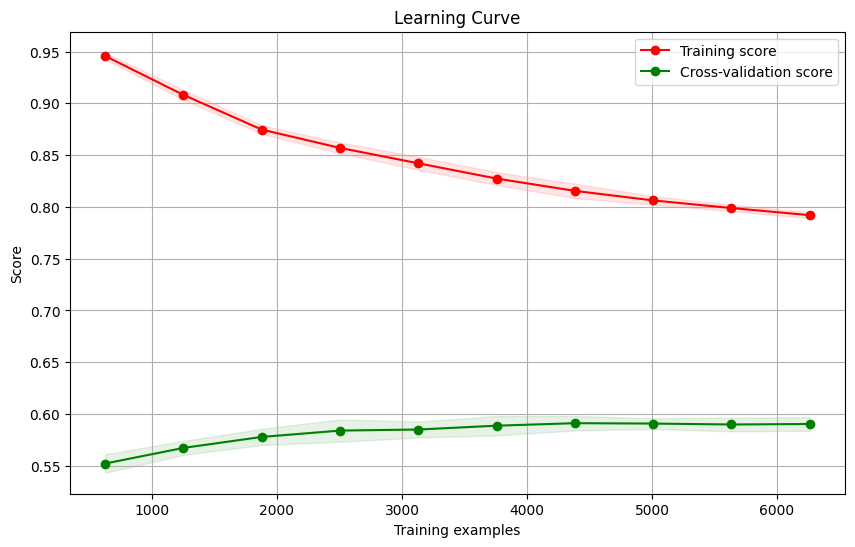

In [56]:
# 定义一个函数来绘制学习曲线
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# 绘制学习曲线
plot_learning_curve(text_classifier.model, "Learning Curve", text_classifier.X_train_tf, y_train, cv=5)
plt.show()

### Observation
The difference between these two curves is important. The results show that our model is obviously overfitting, and the amount of data reduces this problem. However, the improvement of the validation curve is very slow, and we can assume that the model can be improved by adding a lot of data, especially in class 2